# COMP5318 - Machine Learning and Data Mining - S1 2018

## Assignment 1 - Due 07 May 2018, 5:00pm

#### Goup:Group Assignment 1 20

#### Tutor Name

*   Nicholas James
*   Philippe Morere
*   Rafael de Oliveira

Please refer to [Description File](https://drive.google.com/open?id=1fUFTqcjbSR75tiS48imwjlEVxZVS6U42YElwoVPexwY) for information about the assignment.



#### Group Members (name and student number):


*   Zekun Zhang 460154976
*   Meng Zhang 460280806
*   Bonan Gao 480248039 





---



## Authenticate and create PyDrive client.

You will be prompted with a link to click on, and give permission to Google Colab to access your Google Drive. If you don't want to give permission to your personal google drive, create a new gmail account, and complete this process using the new account.

In [1]:
!pip install -U -q PyDrive
!pip install prettytable
from prettytable import PrettyTable 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import datetime
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html


  Running setup.py bdist_wheel for prettytable ... - done
  Stored in directory: /content/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built prettytable


## Import data
Create a "Data" folder in your google drive. Locate the "Data" folder in your drive. Right click and click "share" to get the ID of the folder. Replace < Data folder id > with the id you got. (id should look like "1j8oG_vCmum965Ghg8LdbSkfj-lfi-AZ0" )

In [2]:
file_list = drive.ListFile({'q': "'1CpFXD7oU__jP6qW-mGEa6nMiXY_66JXA' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: training_data.csv, id: 1tbBTzIvDc4_7OrRduLP_EuUf9XxiisWs
title: test_data.csv, id: 1zLD8F0fYeejYNWhHnfA9W2AAmn7VXmaZ
title: training_desc.csv, id: 1uc1iU2cXG6peEXjqZvByDcAxszRDQFxt
title: training_labels.csv, id: 1qSpMnwKTB48wxS-zZMQ7R1ck6C8b6wnf


### Pulling data into Google Colab.

In [3]:
training_data_downloaded = drive.CreateFile({'id': '1tbBTzIvDc4_7OrRduLP_EuUf9XxiisWs'})
training_data_downloaded.GetContentFile('training_data.csv')

training_desc_downloaded = drive.CreateFile({'id': '1uc1iU2cXG6peEXjqZvByDcAxszRDQFxt'})
training_desc_downloaded.GetContentFile('training_desc.csv')

training_labels_downloaded = drive.CreateFile({'id': '1qSpMnwKTB48wxS-zZMQ7R1ck6C8b6wnf'})
training_labels_downloaded.GetContentFile('training_labels.csv')

test_data_downloaded = drive.CreateFile({'id': '1zLD8F0fYeejYNWhHnfA9W2AAmn7VXmaZ'})
test_data_downloaded.GetContentFile('test_data.csv') 


     #client code use this to upload the file to google drive#
     #if you want to upload any result to your drive, you should pull your own client_sectrts in drive.
"""client_downloaded = drive.CreateFile({'id': '<paste the id of client_sectrts.json>'})
   client_downloaded.GetContentFile('client_secrets.json') """


"client_downloaded = drive.CreateFile({'id': '<paste the id of client_sectrts.json>'})\n   client_downloaded.GetContentFile('client_secrets.json') "

### Load data files
(example:)

In [4]:
#rm -rf X.csv y.csv sigma.csv train_data_withlabel.csv test_set.csv training_set.csv
#list the files in the colab
!ls

datalab		      test_data.csv	 training_labels.csv
optimized_dtypes.csv  training_data.csv
predicted_labels.csv  training_desc.csv


In [5]:
#use this code to test the memory and GPU
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /content/.cache/pip/wheels/17/0f/04/b79c006972335e35472c0b835ed52bfc0815258d409f560108
Successfully built gputil
  Running setup.py bdist_wheel for humanize ... - done
  Stored in directory: /content/.cache/pip/wheels/69/86/6c/f8b8593bc273ec4b0c653d3827f7482bb2001a2781a73b7f44
Successfully built humanize
Gen RAM Free: 11.5 GB  I Proc size: 1.3 GB
GPU RAM Free: 11439MB | Used: 0MB | Util   0% | Total 11439MB




---


## A. Introduction (max 500 words)


1- What is the aim of the study?


>200 thousands(The Statistics Portal, 2017) and 900 thousands (The Statistics Portal, 2018) of new mobile applications are added to Apple store and Google Play  respectively, and the classification of labels are based on app’s description. However, the classification of mobile application labels is currently based on manual identification. We aim to apply machine learning algorithms into textual data mining, and try to figure out precise and efficient classification of application labels. A model using PCA (Principal component analysis) for dimension reduction and logistic regression for classification will be presented, we conduct experiments to determine the optimal parameters for the classifier. 10-fold cross validation results show that we are able to produce a classifier with 62.06% accuracy.

2- Why is this study important?

>The classification methods could be applied to other text data mining domains. Huge amounts of new data and information are generated every minute through social, economic as well as academic activities, much of them with significant potential economic value, however these values are hiding in countless pages of Plain-language text. Techniques such as text data mining and analytics are required to find out useful information from unstructured text data. According to Diane (2018), text mining helps researchers to leverage value from and make sense of vast amounts of raw information sources including scholarly communications and the web. Moreover, it is also proved that classification based on texting data mining and analytics have the potential to enable society and business to use the research base more effectively. Ananiadou et al. (2010) showed a number of text data mining tools including automatic clustering of results and classification of documents as well as automatic highlighting key terms within documents. By applying this text data mining services reduces approximately 755 of labor effort. 



## B. Methods (max 1500 words)

### Pre-processing

>Pre-processing is a foundation part of our whole assignment. Firstly, read the ***training_labels.csv*** file to group all the label into one dictionary and sort them based on the alphabet order from A to Z. Then read the ***“training_data.csv”*** to match all the labels and replace them with their indices. For example, a data with "Arcade and Action" will have a label replaced by 0 since 0 is the indices of "Arcade and Action" in "lableArray". 


>Then we will count the size of the whole ***“train_data_withlabel.csv”*** and it turns out we have 20103 rows and 13628 columns within it. After that, a 2013 x 13627 nparray ***X_y*** will be initialized to store all the record without each Video’s URL. 


>In next step, we shuffle the ***X_y*** to make sure the order of each row is randomly ordered. Then slice them into four different arrays: ***“Train_X”***, which has first 80% of the dataset; ***“Train_y.csv”***, which stored every video’s label number in ***“Train_X”*** correspondingly. While ***“Test_X”*** and ***“Test_y”*** are the rest 20% part of the training data been sliced in a way same as the previous two. Below is the format of X and Y in both Training set and Test set.

$$\begin{bmatrix}
y_{1}\\ 
y_{2}\\ 
\vdots \\ 
y_{m}\\ 
\end{bmatrix}\,
y\in \mathbb{R}^{n}$$



$$\begin{bmatrix}
 & \dots(X^{(1)})^\top\dots &\\
 & \dots(X^{(2)})^\top \dots& \\    
 &  \vdots & \\
 & \dots (X^{(m)})^\top \dots& 
\end{bmatrix}\,X\in \mathbb{R}^{m\times n}$$




---


>After all steps above, we will start applying Principal component analysis (PCA) to reduce dimensions of the dataset, which can be separate to 4 steps.



>Step 1: Compute “covariance matrix”: $$Sigma = \frac{1}{m}X' \times X$$



>Step 2: Compute “eigenvectors” of matrix Sigma:$$X=U\Sigma \mathbf{V}^\top$$  $$[U,S,V] = svd(Sigma)$$
>Since U is the eigenvector of the product of **X(transpose)** and **X**, we can use it directlty to do PCA dimension reduction.



>Step 3: Find out the reduced eigenvector $$U reduce = U(:,:k)$$





>Step 4: In training stage, we use reduced ***U*** to perform dimension reduction on ***X*** and therefore get ***Z***. Furthermore, we use ***Z*** instead of ***X*** to do the calculation, while ***Y*** still stands for each label for each row.
$$Z = X * U reduce$$

$$\begin{bmatrix}
y_{1}\\ 
y_{2}\\ 
\vdots \\ 
y_{m}\\ 
\end{bmatrix}\,
y\in \mathbb{R}^{n}$$



$$\begin{bmatrix}
 & \dots(Z^{(1)})^\top\dots &\\
 & \dots(Z^{(2)})^\top \dots& \\    
 &  \vdots & \\
 & \dots (Z^{(m)})^\top \dots& 
\end{bmatrix}\,Z\in \mathbb{R}^{m\times n}$$


---











>The number of principal components k is chosen according to the variance retained

>$$Variance Retained = \frac{Average\ squared\ projection\ error}{Total\ variation\ in\ the\ data}$$





>In the second step of PCA, we can get a sparse matrix like:

$$\begin{bmatrix}
 S_{11}&  \cdots &0 \\ 
 \vdots &\ddots   & \vdots \\ 
0 & \cdots  & S_{nn}
\end{bmatrix}$$

>Also, the variance retained can be easily get by calculating:
$$Variance\ Retained = \frac{\sum_{k=1}^{n}S_{ii}} {\sum_{i=1}^{n}S_{ii}}$$








>In the calculation, the tricky part is how to choose a K-value properly with the highest accuracy reserved and achieve high performance/efficiency in the training stage. We test our code on both Google Colab and our laptop and it turns out that when 95% variance is retained, the K-value is 4362. While 90% variance retained with a K-value 3085, 80% variance retained with a K-value 1860. 


>To finish the training stage with 95% variance retained, it takes nearly 2 hours on our laptop which has an Intel i7 4700mq 4 cores CPU with 16GB DDR3 memory and 250G Samsung SSD. When it comes to Google Colab, the execution program sometimes crashed if the memory is not properly managed and if the crash did not happen, it may take up to 3 hours to execute the training algorithm. Since we cannot achieve high efficiency when the K-value is high, we test our K-value starts at a smaller number from 50 to 500. 





>We provide some research from a widening view in **Experiment and result part** to show why we chose K-value = 300 for our training model.

---









#### Process the original data. Combine first and split them in to 4 parts.（Estimated running time：6 minutes）

In [0]:
#import library
start_time = datetime.datetime.now()
import csv
import numpy as np
import random
import scipy as scipy

In [7]:
#group all the labels and build the labelArray
dict_labels = {}
with open('training_labels.csv') as training_labe_group:
    spamreader_label = csv.reader(training_labe_group, quotechar=',')
    for row in spamreader_label:
        dict_labels[row[1]] = row[0]
    labelArray = sorted(dict_labels.keys())
    print (labelArray)
 


['Arcade and Action', 'Books and Reference', 'Brain and Puzzle', 'Business', 'Cards and Casino', 'Casual', 'Comics', 'Communication', 'Education', 'Entertainment', 'Finance', 'Health and Fitness', 'Libraries and Demo', 'Lifestyle', 'Media and Video', 'Medical', 'Music and Audio', 'News and Magazines', 'Personalization', 'Photography', 'Productivity', 'Racing', 'Shopping', 'Social', 'Sports', 'Sports Games', 'Tools', 'Transportation', 'Travel and Local', 'Weather']


In [0]:
#match the video and its label
dict = {}
with open('training_labels.csv') as training_label:
    spamreader = csv.reader(training_label, quotechar=',')
    for row in spamreader:
        dict[row[0]] = row[1] 
                
with open('training_data.csv') as training_data:
    spamreader = csv.reader(training_data, quotechar=',')
    newfile = open('train_data_withlabel.csv', 'w')
    for row in spamreader:
        for column in row:
            newfile.write(str(column) + ',')
        newfile.write(dict[row[0]] + '\n')


In [9]:
#count column
count_traindata_column = 0
with open('train_data_withlabel.csv') as train_set:
  spamreader = csv.reader(train_set, quotechar=',')
  for row in spamreader:
    count_traindata_column = len(row)
    break
print("Count column finish. There are",count_traindata_column,"colums")

Count column finish. There are 13628 colums


In [10]:
#count the size of train_set
count_traindata_row = 20104
count_stop_tag = 0
with open('train_data_withlabel.csv') as join:
    y = []
    textLabel = []
    spamreader = csv.reader(join, quotechar=',')
    for row in spamreader:
        a = len(row)
        if len(row[a - 1]) > 1:
            count_stop_tag = count_stop_tag + 1
            continue
        else:
            break

print("Count row finish. There are",count_stop_tag,"rows")

Count row finish. There are 20103 rows


In [11]:
# create a nparry with all numbers are 0
# count_traindata_column - 1  <- because we want to delete the video id here
X_y = np.zeros((count_stop_tag, count_traindata_column-1), dtype=np.float32)
X_y.shape

(20103, 13627)

In [12]:
#open the csv train_data_withlabel, and put X and y in to the np.array
count_row = 0
with open('train_data_withlabel.csv') as X_file:
    spamreader = csv.reader(X_file, quotechar=',')
    for row in spamreader:
        for i in range(1,13628):
          if i < 13627:
            if float(row[i]) != 0:
              floatnum = float(row[i])
              X_y[count_row][i-1] = floatnum
          else :
            X_y[count_row][i-1] = labelArray.index(row[i])
        count_row = count_row + 1
        if count_row == count_stop_tag:
            break
X_y

array([[ 0.,  0.,  0., ...,  0.,  0., 19.],
       [ 0.,  0.,  0., ...,  0.,  0., 23.],
       [ 0.,  0.,  0., ...,  0.,  0., 12.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 10.],
       [ 0.,  0.,  0., ...,  0.,  0., 14.],
       [ 0.,  0.,  0., ...,  0.,  0.,  9.]], dtype=float32)

In [13]:
#shuffle the nparry and we can see the difference between this X_y and previous one.
np.random.shuffle(X_y)
X_y

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 18.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  8.],
       [ 0.,  0.,  0., ...,  0.,  0., 29.],
       [ 0.,  0.,  0., ...,  0.,  0., 20.]], dtype=float32)

In [0]:
#split the X_y into 4 parts Train_X & Train_y are used to train the data and the test sets are used to do validation.
Train_X = X_y[:16082,:13626]
Train_y = X_y[:16082,13626:]
Test_X = X_y[16082:,:13626]
Test_y = X_y[16082:,13626:]

In [0]:
#save the data in to colab, in case interrupt
with open('Train_X.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quotechar='\n', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(Train_X)
with open('Train_y.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quotechar='\n', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(Train_y)
with open('Test_X.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quotechar='\n', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(Test_X)
with open('Test_y.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quotechar='\n', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(Test_y)

In [16]:
#@title 默认标题文本
# Test the Gen RAM Free
process = psutil.Process(os.getpid())
print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
print('\nSplit + Process the original data. Combine first and split them in to 4 parts. (Time: {})'.format(datetime.datetime.now() - start_time))

Gen RAM Free: 10.4 GB  I Proc size: 2.4 GB

Split + Process the original data. Combine first and split them in to 4 parts. (Time: 0:05:51.616259)


 #### Visualise Raw Data（Estimated running time：8 mins）
This part of code just visualise raw data and will havee no effect on the results.(Optional)

Fig.1 Number of applicaitons in each label


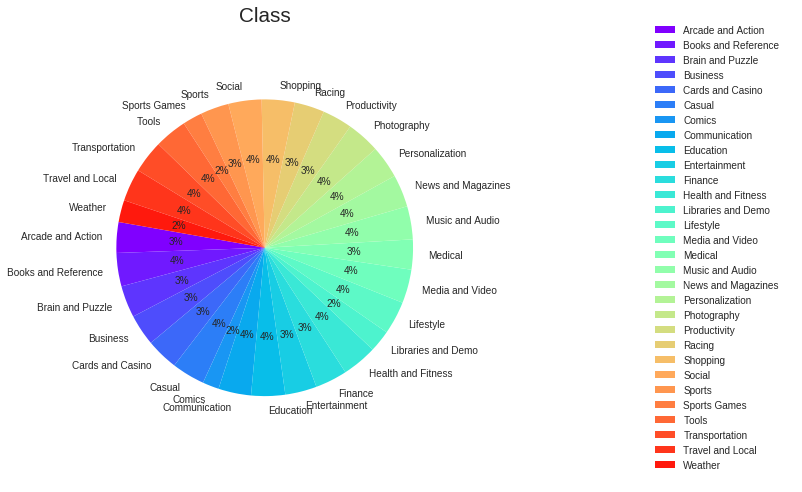

Arcade and Action : 671.0
Books and Reference : 730.0
Brain and Puzzle : 699.0
Business : 684.0
Cards and Casino : 703.0
Casual : 726.0
Comics : 359.0
Communication : 716.0
Education : 743.0
Entertainment : 692.0
Finance : 702.0
Health and Fitness : 766.0
Libraries and Demo : 479.0
Lifestyle : 726.0
Media and Video : 738.0
Medical : 657.0
Music and Audio : 725.0
News and Magazines : 710.0
Personalization : 715.0
Photography : 728.0
Productivity : 656.0
Racing : 654.0
Shopping : 723.0
Social : 726.0
Sports : 621.0
Sports Games : 432.0
Tools : 709.0
Transportation : 716.0
Travel and Local : 713.0
Weather : 484.0


In [17]:
start_time = datetime.datetime.now()
# count and plot number of applicaitons in each label
print("Fig.1 Number of applicaitons in each label")
y=X_y[:,13626:].astype(np.int32)
from matplotlib import font_manager as fm 
from matplotlib import cm 
import matplotlib.pyplot as plt
y_count=np.zeros(30)
for i in y:
  y_count[i]=y_count[i]+1
y_count.astype(np.int32)

fig, axes = plt.subplots(figsize=(10,7),ncols=2) 
ax1, ax2 = axes.ravel() 
colors = cm.rainbow(np.arange(len(y_count))/len(y_count))  
patches, texts, autotexts = ax1.pie(y_count, labels=labelArray, autopct='%1.0f%%',shadow=False, startangle=170, colors=colors) 
ax1.axis('equal')  
proptease = fm.FontProperties() 
proptease.set_size('small') 
plt.setp(autotexts, fontproperties=proptease) 
plt.setp(texts, fontproperties=proptease) 
ax1.set_title('Class',size='xx-large', loc='center')  
ax2.axis('off') 
ax2.legend(patches, labelArray, loc=5) 
plt.tight_layout() 

plt.show() 
for i in range(len(y_count)):
  print(labelArray[i],':',y_count[i])

In [0]:
#count tfidf > 0.75 
def tfidf_count(x,y,value):
  x_c=x[y==value]
  n, m = x_c.shape
  #size_nonzero = np.count_nonzero(x_c)
  #size_x = n * m
  tfidf=[]
  j_count=[]
  for i in range(0,n):
    for j in range(1,m):
      if(x_c[i,j]>=0.75):
        tfidf.append(x_c[i,j])
        j_count.append(j)
  return tfidf,j_count

In [0]:
x=X_y[:,:13626]
y=y.reshape(y.shape[0],)
x0,j0=tfidf_count(x,y,0)
x1,j1=tfidf_count(x,y,1)
x2,j2=tfidf_count(x,y,2)
x3,j3=tfidf_count(x,y,3)
x4,j4=tfidf_count(x,y,4)
x5,j5=tfidf_count(x,y,5)
x6,j6=tfidf_count(x,y,6)
x7,j7=tfidf_count(x,y,7)
x8,j8=tfidf_count(x,y,8)
x9,j9=tfidf_count(x,y,9)
x10,j10=tfidf_count(x,y,10)
x11,j11=tfidf_count(x,y,11)
x12,j12=tfidf_count(x,y,12)
x13,j13=tfidf_count(x,y,13)
x14,j14=tfidf_count(x,y,14)
x15,j15=tfidf_count(x,y,15)
x16,j16=tfidf_count(x,y,16)
x17,j17=tfidf_count(x,y,17)
x18,j18=tfidf_count(x,y,18)
x19,j19=tfidf_count(x,y,19)
x20,j20=tfidf_count(x,y,20)
x21,j21=tfidf_count(x,y,21)
x22,j22=tfidf_count(x,y,22)
x23,j23=tfidf_count(x,y,23)
x24,j24=tfidf_count(x,y,24)
x25,j25=tfidf_count(x,y,25)
x26,j26=tfidf_count(x,y,26)
x27,j27=tfidf_count(x,y,27)
x28,j28=tfidf_count(x,y,28)
x29,j29=tfidf_count(x,y,29)

Fig.2  Distribution of non-zero tf-idf(>0.75) values of each label


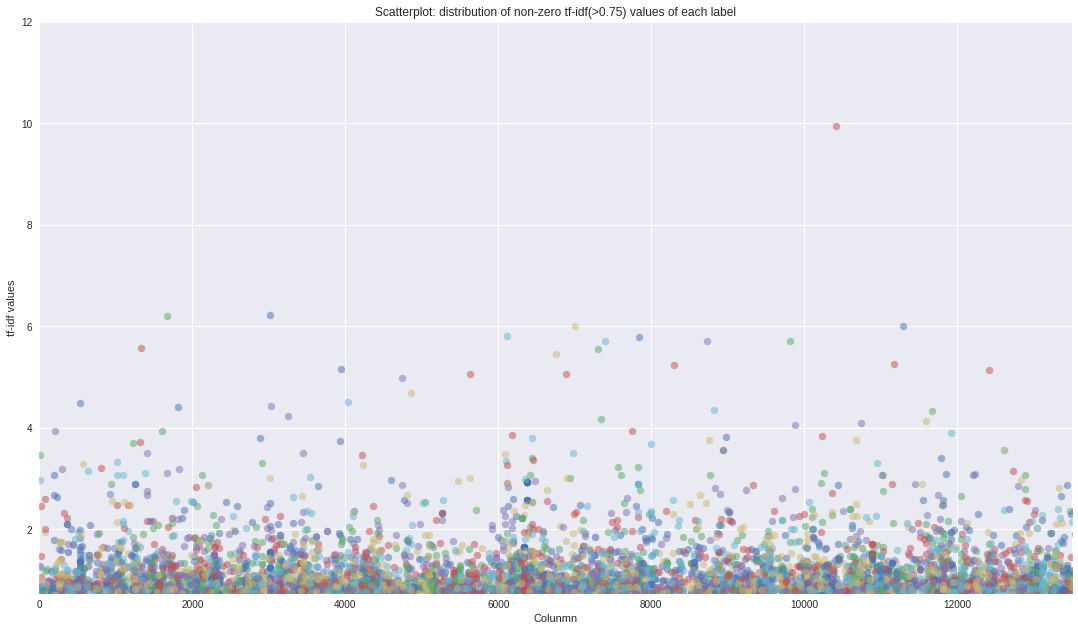


Split + Visualise Raw Data (Time: 0:07:33.287375)


In [20]:
#plot distribution of non-zero tf-idf(>0.75) values of each label
print('Fig.2  Distribution of non-zero tf-idf(>0.75) values of each label')
plt.scatter(j0,x0,alpha=0.5)
plt.scatter(j1,x1,alpha=0.5)
plt.scatter(j2,x2,alpha=0.5)
plt.scatter(j3,x3,alpha=0.5)
plt.scatter(j4,x4,alpha=0.5)
plt.scatter(j5,x5,alpha=0.5)
plt.scatter(j6,x6,alpha=0.5)
plt.scatter(j7,x7,alpha=0.5)
plt.scatter(j8,x8,alpha=0.5)
plt.scatter(j9,x9,alpha=0.5)
plt.scatter(j10,x10,alpha=0.5)
plt.scatter(j11,x11,alpha=0.5)
plt.scatter(j12,x12,alpha=0.5)
plt.scatter(j13,x13,alpha=0.5)
plt.scatter(j14,x14,alpha=0.5)
plt.scatter(j15,x15,alpha=0.5)
plt.scatter(j16,x16,alpha=0.5)
plt.scatter(j17,x17,alpha=0.5)
plt.scatter(j18,x18,alpha=0.5)
plt.scatter(j19,x19,alpha=0.5)
plt.scatter(j20,x20,alpha=0.5)
plt.scatter(j21,x21,alpha=0.5)
plt.scatter(j22,x22,alpha=0.5)
plt.scatter(j23,x23,alpha=0.5)
plt.scatter(j24,x24,alpha=0.5)
plt.scatter(j25,x25,alpha=0.5)
plt.scatter(j26,x26,alpha=0.5)
plt.scatter(j27,x27,alpha=0.5)
plt.scatter(j28,x28,alpha=0.5)
plt.scatter(j29,x29,alpha=0.5)
plt.title('Scatterplot: distribution of non-zero tf-idf(>0.75) values of each label')  
plt.axis([0,13500,0.75,12])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.ylabel('tf-idf values')
plt.xlabel('Colunmn')
plt.show()
print('\nSplit + Visualise Raw Data (Time: {})'.format(datetime.datetime.now() - start_time))

free 12.8GB

In [21]:
"""#read Train_X from file
Train_X = np.zeros((16082, 13626))
count_row = 0
with open('Train_X.csv') as X_file:
    spamreader = csv.reader(X_file, quotechar=',')
    for row in spamreader:
        for i in range(0, 13626):
            floatnum = float(row[i])
            Train_X[count_row][i] = floatnum
        count_row = count_row + 1
        if count_row == 16082:
            break"""

"#read Train_X from file\nTrain_X = np.zeros((16082, 13626))\ncount_row = 0\nwith open('Train_X.csv') as X_file:\n    spamreader = csv.reader(X_file, quotechar=',')\n    for row in spamreader:\n        for i in range(0, 13626):\n            floatnum = float(row[i])\n            Train_X[count_row][i] = floatnum\n        count_row = count_row + 1\n        if count_row == 16082:\n            break"

#### Implement PCA to do reduce dimension(Estimated running time:4 mins)

In [2]:
start_time = datetime.datetime.now()
#calculate the sigma
m = len(Train_X)
sigma = (1/m) * np.dot(Train_X.T, Train_X)
sigma

NameError: name 'Train_X' is not defined

In [0]:
# Test the Gen RAM Free
print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))

Gen RAM Free: 8.0 GB  I Proc size: 4.9 GB


In [0]:
#Do the svd
U300, s300, _  = scipy.sparse.linalg.svds(sigma, k=300, return_singular_vectors="u")
s300 = np.asarray([s300])
s300 = np.transpose(s300)
print (s300.shape)
print (U300.shape)

(300, 1)
(13626, 300)


The following code can be used to calculate all the U&S and find the k to retain 95% data.
Since this would cost so many to do PAC, we just calculate k=300.

In [0]:
"""#Calculate all the U&s
u, s, vt = np.linalg.svd(sigma, full_matrices = False)
#find the number of column to retain
sumS = sum(s)
k=-1
for i in range(0,len(s)):
    sumSsmall = sum(s[0:i])
    per = sumSsmall/sumS
    if per > 0.95:
        k = i
        print(i)
        break"""

4338


In [0]:
#sive s300 and U300 into the colab. In case interrupt
with open('s300.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quotechar='\n', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(s300)
with open('U300.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quotechar='\n', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(U300)   

In [0]:
Z300 = np.dot(Train_X, U300)
Z300.shape
print('\nImplement PCA to do reduce dimension(Time: {})'.format(datetime.datetime.now() - start_time))


Implement PCA to do reduce dimension(Time: 0:04:21.155270)


### Classifier(Estimated running time: 4 mins)

>Our classifier is based on logistic regression, with one-vs-all(OVA) method. Logistic regression is widely used in classification (Dong, Wesseloo, Potvin & Li, 2016). The hypothesis of logistic regression is
\begin{align}
h_𝜃(x)=\frac{1}{1+e^{-𝜃^{T}X}}
\end{align}
This function is also called sigmoid function, and its range is between o and 1.
The cost of each logistic regression is
\begin{align}
cost(h_𝜃(x),y) = \left\{ \begin{array}{}
log(h_𝜃(x)) & \textrm{if $y=1$}\\
-log(1-h_𝜃(x)) & \textrm{if $y=0$}
\end{array} \right.=\ -ylog(h_𝜃(x))-(1-y)log(1-h_𝜃(x))
\end{align}
So, the cost function J(𝜃) for the logistic regression is
\begin{align}
J(𝜃)=-\frac{1}{m}[\sum_{i=1}^{n}y^{(i)}log(h_𝜃(x^{(i)})+(1-y^{(i)})log(1-h_𝜃(x^{(i)}))]
\end{align}
The cost function J(𝜃) is also the objective function of logistic regression, the aim of logistic regression is to find a matrix 𝜃 to achieve the minimize of the cost function.
Furthermore, in order to prevent over fitting, a regulation is added to the function, thus:
\begin{align}
J(𝜃)=-\frac{1}{m}[\sum_{j=1}^{n}y^{(i)}log(h_𝜃(x^{(i)})+(1-y^{(i)})log(1-h_𝜃(x^{(i)}))]+\frac{𝜆}{2m}\sum_{i=1}^{m}𝜃_j^2
\end{align}
The logistic regression can only do binary classification, however, in this case, the applications should be classified in to 30 classes. There are basically two strategies to turn a binary algorithm into a multinomial classifiers, one-vs-one(OVO) and one-vs-all(OVA).
In one-vs-all method, we first assume one class as positive, while the rest as negative, and calculate and store the probability of the positive class. After that, we assume another class as positive and all other as negative, calculate and store its probability. This process will be continue until every class has been assumed as positive once. Finally, we have a single classifier for each class, and pick up the maximal value as its catalogue. The complexity of one-vs-all method is determined by the number of classes, and in this case, there are 30 classes, so the logistic regression need to loop 30 times.

>In one-vs-one method, we first choose two classes and train a classifier based on logistic regression for them and then pick another two classes etc. until all combinations have been tried. Since all combinations have been trained, the classifier based on one-vs-one will be more accurate. However, the training process will conduct 435 loops which exceeds acceptable time.
Loop times of two method:
\begin{align}One-vs-one=C_{30}^2=435\end{align}
\begin{align}One-vs-all=C_{30}^1=30\end{align}
After compare this two method, we decided to use one-vs-all method, for it can save a lot time with a small loss of precision. 

>During the logistic regression, we use Newton method instead of traditional gradient descent as an advanced optimization. Newton method is a method to find better approximate value of the root (Lin, Weng & Keerthi, 2008). The Newton method of one varibale is shown as follows:
Expand the nonlinear function f(x) into Taylor series at x0, then:
\begin{align}
f(x_0)+(x-x_0)f^{'}(x_0)=0
\end{align}
\begin{array}
\ set& f^{'}(x_0)\neq0
\ & \textrm then& \textrm x=x_1=x_0-\frac{f(x_0)}{f^{'}{(x_0)}}
\end{array}
Here, the value of f(x1) is closer to f(x)=0 than f(x0), so process is repeated as
\begin{align}
x_{n+1}=x_{n}-\frac{f(x_n)}{f^{'}{(x_n)}}
\end{align}
until a sufficiently accurate value is reached.

In [0]:
start_time = datetime.datetime.now()
def oneVsAll (X, U, y, label_numbers, lam):
    Z = np.dot(X, U)
    (ZRows, ZColumns) = Z.shape  
    all_theta = np.zeros((label_numbers, ZColumns+1))
    Z = np.c_[np.ones((Z.shape[0],1)),Z] #add ones to Z    
    for i in range(label_numbers):
        initial_theta = np.matrix(np.zeros(Z.shape[1])).T #create initial theta as a colunm vector
        yix = np.matrix([1 if y[j] == i else 0 for j in range(Z.shape[0])]).T
        all_theta[i,:] = newton(initial_theta,Z,yix,lam,0.25,0.5,50,1e-8).T
    return all_theta

def oneVsAll_ten_fold (X, U, y, label_numbers, lam):
    Z = np.dot(X, U)
    (ZRows, ZColumns) = Z.shape  
    all_theta = np.zeros((label_numbers, ZColumns+1))
    Z = np.c_[np.ones((Z.shape[0],1)),Z] #add ones to Z    
    for i in range(label_numbers):
        initial_theta = np.matrix(np.zeros(Z.shape[1])).T #create initial theta as a colunm vector
        yix = np.matrix([1 if y[j] == i else 0 for j in range(Z.shape[0])]).T
        all_theta[i,:] = newton_ten_fold(initial_theta,Z,yix,lam,0.25,0.5,50,1e-8).T
    return all_theta
    
def newton(theta,X,y,lamb,alpha,beta,itera,tol):
    for i in range(itera):
        grad = gradDes(theta,X,y,lamb)
        H = hessian(theta,X,lamb)
        xt = np.linalg.solve(H,-grad)
        ntdc = -grad.T*xt
        if abs(ntdc)/2 < tol:
            print ('Terminated, iteration number',i)
            return theta
        J = costFunction(theta,X,y,lamb)
        alphaGradx = alpha*(grad.T*xt)
        t = 1
        costFunctionNew = costFunction(theta+t*xt,X,y,lamb)
        while costFunctionNew > J+t*alphaGradx or np.isnan(costFunctionNew):
            t = beta*t
            costFunctionNew = costFunction(theta+t*xt,X,y,lamb)
        theta = theta + t*xt
    print ('cost:',J)
    return theta

def newton_ten_fold(theta,X,y,lamb,alpha,beta,itera,tol):
    for i in range(itera):
        grad = gradDes(theta,X,y,lamb)
        H = hessian(theta,X,lamb)
        xt = np.linalg.solve(H,-grad)
        ntdc = -grad.T*xt
        if abs(ntdc)/2 < tol:
            return theta
        J = costFunction(theta,X,y,lamb)
        alphaGradx = alpha*(grad.T*xt)
        t = 1
        costFunctionNew = costFunction(theta+t*xt,X,y,lamb)
        while costFunctionNew > J+t*alphaGradx or np.isnan(costFunctionNew):
            t = beta*t
            costFunctionNew = costFunction(theta+t*xt,X,y,lamb)
        theta = theta + t*xt
    return theta  
    
def costFunction(theta,X,y,lamb):
    g = X*theta
    return (-y.T*np.log(sigmoid(g))-(1-y).T*np.log(1-sigmoid(g)))/y.shape[0]+(theta[1:,:].T*theta[1:,:]*lamb/2)/y.shape[0]

def gradDes(theta,X,y,lamb):
    sigmoidXbyT = sigmoid(X*theta)
    grad = np.matrix(np.zeros(theta.shape[0])).T
    grad[0] = X[:,0].T*(sigmoidXbyT-y)
    grad[1:] = X[:,1:].T*(sigmoid(X*theta)-y)+lamb*theta[1:]
    return grad/y.shape[0]
    
def hessian(theta,X,lamb):
    sigmoidXbyT = sigmoid(X*theta)
    H = X.T*np.diag(np.sqrt(np.multiply(sigmoidXbyT,1-sigmoidXbyT)))
    Htheta = np.matrix(np.eye(X.shape[1]))
    Htheta[0][0] = 0
    return (np.dot(H,H.T)+lamb*Htheta)/X.shape[0]
        
def sigmoid(z):
    return 1/(1+np.exp(-z))
    #SIGMOID

In [0]:
# Use all the theta to calculate the predict category
def predictOneVsAll(all_theta,Z):
    Z = np.c_[np.ones((Z.shape[0],1)),Z] #add one colunm 1 to X
    hypothesis = np.dot(Z,all_theta.T)
    y = np.matrix(np.zeros(Z.shape[0])).T
    for i in range(hypothesis.shape[0]):
        for j in range(hypothesis.shape[1]):
            if hypothesis[i,j] == np.max(hypothesis[i,:]):
                y[i] = j
    return y

In [0]:
# Test the Gen RAM Free
print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))

Gen RAM Free: 8.0 GB  I Proc size: 4.9 GB


In [0]:
lamb = 0.1
num_labels = len(labelArray)

In [0]:
#write all_theta in to the file
all_theta = oneVsAll(Train_X, U300, Train_y, num_labels, lamb)
with open('all_theta_Z300.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quotechar='\n', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(all_theta)
print("training finish")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log


cost: [[0.0825045]]
cost: [[0.09202641]]
cost: [[0.07426662]]
cost: [[0.09577964]]
cost: [[0.03989044]]
cost: [[0.09622405]]
cost: [[0.04783301]]
cost: [[0.08577287]]
cost: [[0.0910451]]
cost: [[0.11395329]]
cost: [[0.04733277]]
cost: [[0.07392617]]
cost: [[0.06258936]]
cost: [[0.11714781]]
cost: [[0.08747819]]
cost: [[0.05751084]]
cost: [[0.0747317]]
cost: [[0.07221844]]
cost: [[0.07539665]]
cost: [[0.06718006]]
cost: [[0.10205952]]
cost: [[0.0546247]]
cost: [[0.05544113]]
cost: [[0.08965903]]
cost: [[0.06907576]]
cost: [[0.05712255]]
cost: [[0.10303647]]
cost: [[0.07620002]]
cost: [[0.0809348]]
cost: [[0.03389148]]
training finish


In [0]:
#Test to accuracy
def Accuracy(U,X,y,theta):
  Z = np.dot(X, U)
  pred_y = predictOneVsAll(theta,Z)
  
  pitch = 0
  for i in range(len(y)):
    if y[i] != pred_y[i]:
        print ('OOPS~~ERROR predict   Num of Data:',i+1,'right label',y[i],' predicted: ', pred_y[i])
    else:
        pitch = pitch + 1
  print ('Accuracy test finish!!!!   Training Accuracy:',(1.0*pitch)/len(y))
  return


In [0]:
print('\nClassifier(Time: {})'.format(datetime.datetime.now() - start_time))


Classifier(Time: 0:04:45.516231)


### Validation(Estimated running time:30 secs)
This part only test the accuracy of training & test set, the ten-fold validation is in the following part.

In [0]:
"""#read Test_X from file
Test_X = np.zeros((4021, 13626))
count_row = 0
with open('Test_X.csv') as X_file:
    spamreader = csv.reader(X_file, quotechar=',')
    for row in spamreader:
        for i in range(0, 13626):
            floatnum = float(row[i])
            Test_X[count_row][i] = floatnum
        count_row = count_row + 1
        if count_row == 4021:
            break
Test_X"""

In [0]:
"""#read Test_y from file
Test_y = np.zeros((4021, 1))
count_row = 0
with open('Test_y.csv') as X_file:
    spamreader = csv.reader(X_file, quotechar=',')
    for row in spamreader:
        for i in range(0, 1):
            floatnum = float(row[i])
            Test_y[count_row][i] = floatnum
        count_row = count_row + 1
        if count_row == 4021:
            break
Test_y"""


In [0]:
start_time = datetime.datetime.now()
#Test the accuracy of train set
Accuracy(U300, Train_X, Train_y, all_theta)

OOPS~~ERROR predict   Num of Data: 4 right label [5.]  predicted:  [[2.]]
OOPS~~ERROR predict   Num of Data: 6 right label [13.]  predicted:  [[1.]]
OOPS~~ERROR predict   Num of Data: 8 right label [15.]  predicted:  [[7.]]
OOPS~~ERROR predict   Num of Data: 11 right label [19.]  predicted:  [[9.]]
OOPS~~ERROR predict   Num of Data: 12 right label [21.]  predicted:  [[16.]]
OOPS~~ERROR predict   Num of Data: 14 right label [9.]  predicted:  [[7.]]
OOPS~~ERROR predict   Num of Data: 16 right label [20.]  predicted:  [[28.]]
OOPS~~ERROR predict   Num of Data: 17 right label [9.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 18 right label [0.]  predicted:  [[5.]]
OOPS~~ERROR predict   Num of Data: 22 right label [9.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 23 right label [20.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 26 right label [3.]  predicted:  [[14.]]
OOPS~~ERROR predict   Num of Data: 30 right label [20.]  predicted:  [[23.]]
OOPS~~ERROR pr

OOPS~~ERROR predict   Num of Data: 1166 right label [3.]  predicted:  [[14.]]
OOPS~~ERROR predict   Num of Data: 1168 right label [5.]  predicted:  [[23.]]
OOPS~~ERROR predict   Num of Data: 1169 right label [21.]  predicted:  [[0.]]
OOPS~~ERROR predict   Num of Data: 1172 right label [1.]  predicted:  [[23.]]
OOPS~~ERROR predict   Num of Data: 1175 right label [25.]  predicted:  [[21.]]
OOPS~~ERROR predict   Num of Data: 1176 right label [11.]  predicted:  [[13.]]
OOPS~~ERROR predict   Num of Data: 1179 right label [26.]  predicted:  [[7.]]
OOPS~~ERROR predict   Num of Data: 1180 right label [15.]  predicted:  [[12.]]
OOPS~~ERROR predict   Num of Data: 1181 right label [26.]  predicted:  [[20.]]
OOPS~~ERROR predict   Num of Data: 1183 right label [5.]  predicted:  [[9.]]
OOPS~~ERROR predict   Num of Data: 1185 right label [0.]  predicted:  [[5.]]
OOPS~~ERROR predict   Num of Data: 1188 right label [3.]  predicted:  [[28.]]
OOPS~~ERROR predict   Num of Data: 1189 right label [26.]  pre

OOPS~~ERROR predict   Num of Data: 2302 right label [17.]  predicted:  [[14.]]
OOPS~~ERROR predict   Num of Data: 2304 right label [1.]  predicted:  [[9.]]
OOPS~~ERROR predict   Num of Data: 2308 right label [13.]  predicted:  [[22.]]
OOPS~~ERROR predict   Num of Data: 2309 right label [2.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 2310 right label [26.]  predicted:  [[14.]]
OOPS~~ERROR predict   Num of Data: 2313 right label [2.]  predicted:  [[5.]]
OOPS~~ERROR predict   Num of Data: 2315 right label [29.]  predicted:  [[8.]]
OOPS~~ERROR predict   Num of Data: 2318 right label [7.]  predicted:  [[20.]]
OOPS~~ERROR predict   Num of Data: 2321 right label [26.]  predicted:  [[10.]]
OOPS~~ERROR predict   Num of Data: 2325 right label [1.]  predicted:  [[8.]]
OOPS~~ERROR predict   Num of Data: 2327 right label [7.]  predicted:  [[23.]]
OOPS~~ERROR predict   Num of Data: 2328 right label [26.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 2329 right label [4.]  pred

OOPS~~ERROR predict   Num of Data: 3477 right label [26.]  predicted:  [[20.]]
OOPS~~ERROR predict   Num of Data: 3482 right label [20.]  predicted:  [[14.]]
OOPS~~ERROR predict   Num of Data: 3489 right label [25.]  predicted:  [[2.]]
OOPS~~ERROR predict   Num of Data: 3491 right label [11.]  predicted:  [[15.]]
OOPS~~ERROR predict   Num of Data: 3492 right label [3.]  predicted:  [[22.]]
OOPS~~ERROR predict   Num of Data: 3493 right label [24.]  predicted:  [[17.]]
OOPS~~ERROR predict   Num of Data: 3494 right label [23.]  predicted:  [[2.]]
OOPS~~ERROR predict   Num of Data: 3495 right label [28.]  predicted:  [[27.]]
OOPS~~ERROR predict   Num of Data: 3496 right label [26.]  predicted:  [[12.]]
OOPS~~ERROR predict   Num of Data: 3497 right label [11.]  predicted:  [[0.]]
OOPS~~ERROR predict   Num of Data: 3498 right label [11.]  predicted:  [[15.]]
OOPS~~ERROR predict   Num of Data: 3508 right label [20.]  predicted:  [[7.]]
OOPS~~ERROR predict   Num of Data: 3509 right label [14.]

OOPS~~ERROR predict   Num of Data: 4747 right label [1.]  predicted:  [[23.]]
OOPS~~ERROR predict   Num of Data: 4748 right label [20.]  predicted:  [[12.]]
OOPS~~ERROR predict   Num of Data: 4753 right label [9.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 4754 right label [9.]  predicted:  [[23.]]
OOPS~~ERROR predict   Num of Data: 4757 right label [7.]  predicted:  [[18.]]
OOPS~~ERROR predict   Num of Data: 4762 right label [22.]  predicted:  [[13.]]
OOPS~~ERROR predict   Num of Data: 4765 right label [7.]  predicted:  [[3.]]
OOPS~~ERROR predict   Num of Data: 4767 right label [3.]  predicted:  [[26.]]
OOPS~~ERROR predict   Num of Data: 4771 right label [12.]  predicted:  [[2.]]
OOPS~~ERROR predict   Num of Data: 4772 right label [29.]  predicted:  [[3.]]
OOPS~~ERROR predict   Num of Data: 4773 right label [11.]  predicted:  [[16.]]
OOPS~~ERROR predict   Num of Data: 4776 right label [0.]  predicted:  [[5.]]
OOPS~~ERROR predict   Num of Data: 4777 right label [13.]  pred

OOPS~~ERROR predict   Num of Data: 5825 right label [5.]  predicted:  [[0.]]
OOPS~~ERROR predict   Num of Data: 5832 right label [24.]  predicted:  [[27.]]
OOPS~~ERROR predict   Num of Data: 5835 right label [14.]  predicted:  [[16.]]
OOPS~~ERROR predict   Num of Data: 5845 right label [13.]  predicted:  [[28.]]
OOPS~~ERROR predict   Num of Data: 5849 right label [1.]  predicted:  [[20.]]
OOPS~~ERROR predict   Num of Data: 5852 right label [9.]  predicted:  [[7.]]
OOPS~~ERROR predict   Num of Data: 5855 right label [12.]  predicted:  [[28.]]
OOPS~~ERROR predict   Num of Data: 5858 right label [13.]  predicted:  [[16.]]
OOPS~~ERROR predict   Num of Data: 5860 right label [1.]  predicted:  [[2.]]
OOPS~~ERROR predict   Num of Data: 5866 right label [24.]  predicted:  [[25.]]
OOPS~~ERROR predict   Num of Data: 5870 right label [1.]  predicted:  [[11.]]
OOPS~~ERROR predict   Num of Data: 5873 right label [5.]  predicted:  [[2.]]
OOPS~~ERROR predict   Num of Data: 5875 right label [3.]  pred

OOPS~~ERROR predict   Num of Data: 6978 right label [28.]  predicted:  [[11.]]
OOPS~~ERROR predict   Num of Data: 6983 right label [3.]  predicted:  [[22.]]
OOPS~~ERROR predict   Num of Data: 6987 right label [28.]  predicted:  [[10.]]
OOPS~~ERROR predict   Num of Data: 6990 right label [13.]  predicted:  [[1.]]
OOPS~~ERROR predict   Num of Data: 6993 right label [9.]  predicted:  [[22.]]
OOPS~~ERROR predict   Num of Data: 6994 right label [29.]  predicted:  [[28.]]
OOPS~~ERROR predict   Num of Data: 6996 right label [13.]  predicted:  [[1.]]
OOPS~~ERROR predict   Num of Data: 6998 right label [13.]  predicted:  [[0.]]
OOPS~~ERROR predict   Num of Data: 6999 right label [1.]  predicted:  [[28.]]
OOPS~~ERROR predict   Num of Data: 7001 right label [7.]  predicted:  [[26.]]
OOPS~~ERROR predict   Num of Data: 7004 right label [9.]  predicted:  [[14.]]
OOPS~~ERROR predict   Num of Data: 7009 right label [4.]  predicted:  [[0.]]
OOPS~~ERROR predict   Num of Data: 7012 right label [28.]  pre

OOPS~~ERROR predict   Num of Data: 8230 right label [6.]  predicted:  [[0.]]
OOPS~~ERROR predict   Num of Data: 8232 right label [21.]  predicted:  [[18.]]
OOPS~~ERROR predict   Num of Data: 8240 right label [13.]  predicted:  [[26.]]
OOPS~~ERROR predict   Num of Data: 8241 right label [3.]  predicted:  [[20.]]
OOPS~~ERROR predict   Num of Data: 8242 right label [2.]  predicted:  [[8.]]
OOPS~~ERROR predict   Num of Data: 8243 right label [14.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 8246 right label [15.]  predicted:  [[11.]]
OOPS~~ERROR predict   Num of Data: 8250 right label [11.]  predicted:  [[15.]]
OOPS~~ERROR predict   Num of Data: 8251 right label [2.]  predicted:  [[21.]]
OOPS~~ERROR predict   Num of Data: 8252 right label [5.]  predicted:  [[0.]]
OOPS~~ERROR predict   Num of Data: 8259 right label [6.]  predicted:  [[18.]]
OOPS~~ERROR predict   Num of Data: 8264 right label [20.]  predicted:  [[26.]]
OOPS~~ERROR predict   Num of Data: 8265 right label [2.]  pre

OOPS~~ERROR predict   Num of Data: 9493 right label [2.]  predicted:  [[9.]]
OOPS~~ERROR predict   Num of Data: 9494 right label [16.]  predicted:  [[14.]]
OOPS~~ERROR predict   Num of Data: 9497 right label [14.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 9501 right label [22.]  predicted:  [[10.]]
OOPS~~ERROR predict   Num of Data: 9504 right label [24.]  predicted:  [[28.]]
OOPS~~ERROR predict   Num of Data: 9507 right label [6.]  predicted:  [[18.]]
OOPS~~ERROR predict   Num of Data: 9512 right label [14.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 9514 right label [5.]  predicted:  [[0.]]
OOPS~~ERROR predict   Num of Data: 9516 right label [8.]  predicted:  [[4.]]
OOPS~~ERROR predict   Num of Data: 9521 right label [2.]  predicted:  [[9.]]
OOPS~~ERROR predict   Num of Data: 9525 right label [24.]  predicted:  [[25.]]
OOPS~~ERROR predict   Num of Data: 9533 right label [13.]  predicted:  [[20.]]
OOPS~~ERROR predict   Num of Data: 9535 right label [13.]  pr

OOPS~~ERROR predict   Num of Data: 10702 right label [3.]  predicted:  [[23.]]
OOPS~~ERROR predict   Num of Data: 10707 right label [20.]  predicted:  [[3.]]
OOPS~~ERROR predict   Num of Data: 10709 right label [20.]  predicted:  [[7.]]
OOPS~~ERROR predict   Num of Data: 10710 right label [5.]  predicted:  [[2.]]
OOPS~~ERROR predict   Num of Data: 10714 right label [24.]  predicted:  [[7.]]
OOPS~~ERROR predict   Num of Data: 10716 right label [7.]  predicted:  [[26.]]
OOPS~~ERROR predict   Num of Data: 10720 right label [10.]  predicted:  [[3.]]
OOPS~~ERROR predict   Num of Data: 10721 right label [12.]  predicted:  [[26.]]
OOPS~~ERROR predict   Num of Data: 10722 right label [11.]  predicted:  [[13.]]
OOPS~~ERROR predict   Num of Data: 10726 right label [21.]  predicted:  [[27.]]
OOPS~~ERROR predict   Num of Data: 10732 right label [3.]  predicted:  [[16.]]
OOPS~~ERROR predict   Num of Data: 10735 right label [28.]  predicted:  [[27.]]
OOPS~~ERROR predict   Num of Data: 10736 right la

OOPS~~ERROR predict   Num of Data: 11927 right label [27.]  predicted:  [[7.]]
OOPS~~ERROR predict   Num of Data: 11928 right label [21.]  predicted:  [[0.]]
OOPS~~ERROR predict   Num of Data: 11929 right label [14.]  predicted:  [[16.]]
OOPS~~ERROR predict   Num of Data: 11930 right label [1.]  predicted:  [[20.]]
OOPS~~ERROR predict   Num of Data: 11933 right label [23.]  predicted:  [[7.]]
OOPS~~ERROR predict   Num of Data: 11936 right label [20.]  predicted:  [[26.]]
OOPS~~ERROR predict   Num of Data: 11937 right label [9.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 11939 right label [12.]  predicted:  [[26.]]
OOPS~~ERROR predict   Num of Data: 11943 right label [5.]  predicted:  [[0.]]
OOPS~~ERROR predict   Num of Data: 11950 right label [12.]  predicted:  [[1.]]
OOPS~~ERROR predict   Num of Data: 11953 right label [14.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 11962 right label [23.]  predicted:  [[15.]]
OOPS~~ERROR predict   Num of Data: 11964 right l

OOPS~~ERROR predict   Num of Data: 13055 right label [8.]  predicted:  [[3.]]
OOPS~~ERROR predict   Num of Data: 13059 right label [29.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 13060 right label [13.]  predicted:  [[8.]]
OOPS~~ERROR predict   Num of Data: 13064 right label [1.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 13067 right label [13.]  predicted:  [[11.]]
OOPS~~ERROR predict   Num of Data: 13068 right label [17.]  predicted:  [[28.]]
OOPS~~ERROR predict   Num of Data: 13071 right label [21.]  predicted:  [[18.]]
OOPS~~ERROR predict   Num of Data: 13072 right label [20.]  predicted:  [[3.]]
OOPS~~ERROR predict   Num of Data: 13075 right label [25.]  predicted:  [[24.]]
OOPS~~ERROR predict   Num of Data: 13077 right label [21.]  predicted:  [[2.]]
OOPS~~ERROR predict   Num of Data: 13078 right label [2.]  predicted:  [[5.]]
OOPS~~ERROR predict   Num of Data: 13081 right label [10.]  predicted:  [[27.]]
OOPS~~ERROR predict   Num of Data: 13082 right l

OOPS~~ERROR predict   Num of Data: 14207 right label [11.]  predicted:  [[13.]]
OOPS~~ERROR predict   Num of Data: 14210 right label [9.]  predicted:  [[14.]]
OOPS~~ERROR predict   Num of Data: 14212 right label [13.]  predicted:  [[3.]]
OOPS~~ERROR predict   Num of Data: 14217 right label [8.]  predicted:  [[5.]]
OOPS~~ERROR predict   Num of Data: 14218 right label [10.]  predicted:  [[3.]]
OOPS~~ERROR predict   Num of Data: 14236 right label [25.]  predicted:  [[21.]]
OOPS~~ERROR predict   Num of Data: 14238 right label [9.]  predicted:  [[8.]]
OOPS~~ERROR predict   Num of Data: 14239 right label [26.]  predicted:  [[9.]]
OOPS~~ERROR predict   Num of Data: 14245 right label [22.]  predicted:  [[13.]]
OOPS~~ERROR predict   Num of Data: 14248 right label [8.]  predicted:  [[5.]]
OOPS~~ERROR predict   Num of Data: 14251 right label [11.]  predicted:  [[15.]]
OOPS~~ERROR predict   Num of Data: 14256 right label [28.]  predicted:  [[27.]]
OOPS~~ERROR predict   Num of Data: 14259 right lab

OOPS~~ERROR predict   Num of Data: 15337 right label [20.]  predicted:  [[7.]]
OOPS~~ERROR predict   Num of Data: 15338 right label [19.]  predicted:  [[9.]]
OOPS~~ERROR predict   Num of Data: 15339 right label [7.]  predicted:  [[26.]]
OOPS~~ERROR predict   Num of Data: 15340 right label [5.]  predicted:  [[2.]]
OOPS~~ERROR predict   Num of Data: 15342 right label [5.]  predicted:  [[9.]]
OOPS~~ERROR predict   Num of Data: 15344 right label [7.]  predicted:  [[18.]]
OOPS~~ERROR predict   Num of Data: 15352 right label [24.]  predicted:  [[11.]]
OOPS~~ERROR predict   Num of Data: 15354 right label [8.]  predicted:  [[11.]]
OOPS~~ERROR predict   Num of Data: 15355 right label [9.]  predicted:  [[16.]]
OOPS~~ERROR predict   Num of Data: 15358 right label [2.]  predicted:  [[8.]]
OOPS~~ERROR predict   Num of Data: 15374 right label [5.]  predicted:  [[4.]]
OOPS~~ERROR predict   Num of Data: 15378 right label [27.]  predicted:  [[28.]]
OOPS~~ERROR predict   Num of Data: 15380 right label [

In [0]:
#Test the accuracy of test set
Accuracy(U300, Test_X, Test_y, all_theta)

OOPS~~ERROR predict   Num of Data: 4 right label [14.]  predicted:  [[16.]]
OOPS~~ERROR predict   Num of Data: 11 right label [3.]  predicted:  [[20.]]
OOPS~~ERROR predict   Num of Data: 16 right label [3.]  predicted:  [[10.]]
OOPS~~ERROR predict   Num of Data: 17 right label [19.]  predicted:  [[18.]]
OOPS~~ERROR predict   Num of Data: 20 right label [13.]  predicted:  [[27.]]
OOPS~~ERROR predict   Num of Data: 22 right label [21.]  predicted:  [[0.]]
OOPS~~ERROR predict   Num of Data: 24 right label [5.]  predicted:  [[8.]]
OOPS~~ERROR predict   Num of Data: 25 right label [9.]  predicted:  [[14.]]
OOPS~~ERROR predict   Num of Data: 26 right label [3.]  predicted:  [[10.]]
OOPS~~ERROR predict   Num of Data: 27 right label [13.]  predicted:  [[22.]]
OOPS~~ERROR predict   Num of Data: 29 right label [9.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 30 right label [24.]  predicted:  [[3.]]
OOPS~~ERROR predict   Num of Data: 32 right label [14.]  predicted:  [[16.]]
OOPS~~ERR

OOPS~~ERROR predict   Num of Data: 1245 right label [7.]  predicted:  [[23.]]
OOPS~~ERROR predict   Num of Data: 1248 right label [14.]  predicted:  [[9.]]
OOPS~~ERROR predict   Num of Data: 1253 right label [3.]  predicted:  [[11.]]
OOPS~~ERROR predict   Num of Data: 1254 right label [16.]  predicted:  [[17.]]
OOPS~~ERROR predict   Num of Data: 1255 right label [2.]  predicted:  [[0.]]
OOPS~~ERROR predict   Num of Data: 1256 right label [26.]  predicted:  [[7.]]
OOPS~~ERROR predict   Num of Data: 1260 right label [13.]  predicted:  [[5.]]
OOPS~~ERROR predict   Num of Data: 1261 right label [20.]  predicted:  [[14.]]
OOPS~~ERROR predict   Num of Data: 1262 right label [5.]  predicted:  [[2.]]
OOPS~~ERROR predict   Num of Data: 1265 right label [16.]  predicted:  [[26.]]
OOPS~~ERROR predict   Num of Data: 1267 right label [23.]  predicted:  [[28.]]
OOPS~~ERROR predict   Num of Data: 1268 right label [22.]  predicted:  [[27.]]
OOPS~~ERROR predict   Num of Data: 1271 right label [3.]  pre

OOPS~~ERROR predict   Num of Data: 2291 right label [9.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 2294 right label [8.]  predicted:  [[5.]]
OOPS~~ERROR predict   Num of Data: 2295 right label [12.]  predicted:  [[1.]]
OOPS~~ERROR predict   Num of Data: 2298 right label [12.]  predicted:  [[26.]]
OOPS~~ERROR predict   Num of Data: 2299 right label [28.]  predicted:  [[27.]]
OOPS~~ERROR predict   Num of Data: 2301 right label [9.]  predicted:  [[5.]]
OOPS~~ERROR predict   Num of Data: 2305 right label [11.]  predicted:  [[13.]]
OOPS~~ERROR predict   Num of Data: 2308 right label [13.]  predicted:  [[11.]]
OOPS~~ERROR predict   Num of Data: 2313 right label [6.]  predicted:  [[18.]]
OOPS~~ERROR predict   Num of Data: 2318 right label [26.]  predicted:  [[18.]]
OOPS~~ERROR predict   Num of Data: 2319 right label [2.]  predicted:  [[0.]]
OOPS~~ERROR predict   Num of Data: 2321 right label [8.]  predicted:  [[9.]]
OOPS~~ERROR predict   Num of Data: 2322 right label [5.]  predi

OOPS~~ERROR predict   Num of Data: 3324 right label [25.]  predicted:  [[0.]]
OOPS~~ERROR predict   Num of Data: 3326 right label [25.]  predicted:  [[0.]]
OOPS~~ERROR predict   Num of Data: 3329 right label [14.]  predicted:  [[19.]]
OOPS~~ERROR predict   Num of Data: 3336 right label [20.]  predicted:  [[1.]]
OOPS~~ERROR predict   Num of Data: 3337 right label [9.]  predicted:  [[26.]]
OOPS~~ERROR predict   Num of Data: 3338 right label [5.]  predicted:  [[9.]]
OOPS~~ERROR predict   Num of Data: 3341 right label [0.]  predicted:  [[25.]]
OOPS~~ERROR predict   Num of Data: 3343 right label [27.]  predicted:  [[28.]]
OOPS~~ERROR predict   Num of Data: 3346 right label [26.]  predicted:  [[20.]]
OOPS~~ERROR predict   Num of Data: 3348 right label [3.]  predicted:  [[10.]]
OOPS~~ERROR predict   Num of Data: 3354 right label [8.]  predicted:  [[1.]]
OOPS~~ERROR predict   Num of Data: 3357 right label [8.]  predicted:  [[13.]]
OOPS~~ERROR predict   Num of Data: 3358 right label [11.]  pred

In [0]:
# Test the Gen RAM Free
print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))

Gen RAM Free: 8.1 GB  I Proc size: 4.8 GB


In [0]:
print('\nValidation(Time: {})'.format(datetime.datetime.now() - start_time)) 


Validation(Time: 0:00:29.454459)


## C. Experiments and Results (max 500 words)

*We expect you to provide a rigorous performance evaluation. To provide an estimate of the performance (precision, recall, F-measure, etc.) of your classiﬁer in the report, you can perform a 10-fold cross validation on the training set provided and average the metrics for each fold.*

Fig. 3 Confusion Matrix of the test-data(X_axis is the predicted labels & Y_axis is the actual labels)


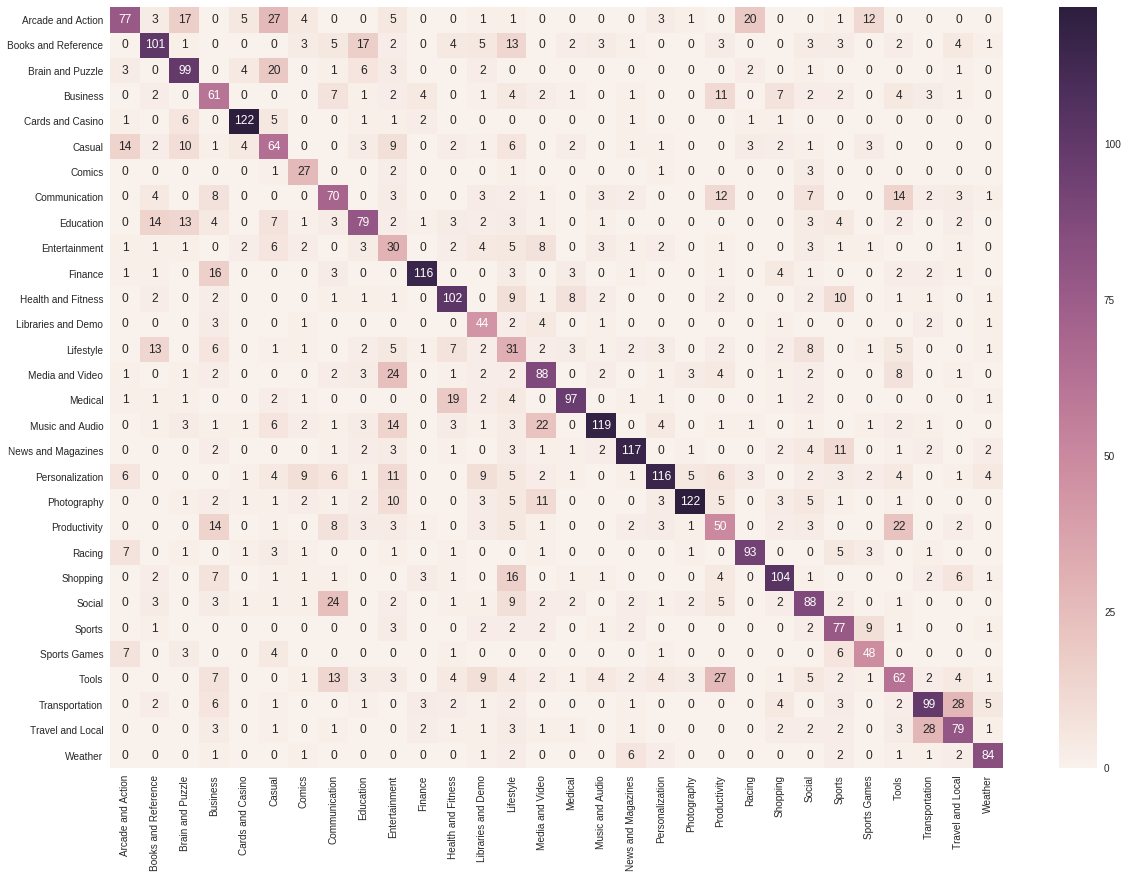

In [0]:
#get confusion-matrix
def confusion(U,X,y,theta):
  confusion_matrix=np.zeros(shape=(30,30))
  Z=np.dot(X,U)
  pred_y=predictOneVsAll(theta,Z)
  for i in range(len(y)):
    confusion_matrix[int(pred_y[i][0])][int(y[i][0])]=confusion_matrix[int(pred_y[i][0])][int(y[i][0])]+1
  return confusion_matrix
confusion_test=confusion(U300,Test_X,Test_y,all_theta)
# plot the confusion matrix
import seaborn as sn
import pandas as pd
def show_confusion_matrix(confusion, labels): 
#     plt.matshow(confusion)
#     plt.colorbar()
#     plt.ylabel('ACTUAL LABEL')
#     plt.xlabel('PREDICTED LABEL')
#     xmarks = np.arange(0,len(labels),1)
#     plt.xticks(xmarks, labels, rotation='vertical')
#     plt.yticks(xmarks, labels, rotation='horizontal')
#     fig = plt.gcf()
#     fig.set_size_inches(25, 18)
      
    plt.figure(figsize=(20,14))
    df_cm=pd.DataFrame(confusion,range(30),range(30))
    df_cm.astype(int)
    
    sn.heatmap(df_cm,annot=True,xticklabels=labels, yticklabels=labels,fmt='.3g')
    plt.show()
    return
print('Fig. 3 Confusion Matrix of the test-data(X_axis is the predicted labels & Y_axis is the actual labels)')
show_confusion_matrix(confusion_test,labelArray)

In [0]:
#GET precision,recall,F1 and support score for each label

label=np.arange(0,30)
x = PrettyTable(['Label', 'Precision', 'recall', 'F1-score','Support'])
for i in label:
  TP=confusion_test[i,i]
  FN = np.sum(confusion_test[i]) - TP
  FP = np.sum(confusion_test[:, i]) - TP
  TN = np.sum(confusion_test) - TP - FN - FP
  precision =(TP / (TP + FP))
  recall = TP / (TP + FN)
  F_measure = TP / (2*TP + FP + FN)
  Support= (TP + FN)
  x.add_row([labelArray[i],round(precision,3),round(recall,3), round(F_measure,3),round(Support,0)])
print('Table 1. Precision,Recall,F1 and Support score for each label')
print(x)

Table 1. Precision,Recall,F1 and Support score for each label
+---------------------+-----------+--------+----------+---------+
|        Label        | Precision | recall | F1-score | Support |
+---------------------+-----------+--------+----------+---------+
|  Arcade and Action  |   0.647   | 0.435  |   0.26   |  177.0  |
| Books and Reference |    0.66   | 0.584  |   0.31   |  173.0  |
|   Brain and Puzzle  |   0.631   | 0.697  |  0.331   |  142.0  |
|       Business      |   0.409   | 0.526  |   0.23   |  116.0  |
|   Cards and Casino  |   0.859   | 0.865  |  0.431   |  141.0  |
|        Casual       |    0.41   | 0.496  |  0.225   |  129.0  |
|        Comics       |   0.466   | 0.771  |   0.29   |   35.0  |
|    Communication    |   0.473   | 0.519  |  0.247   |  135.0  |
|      Education      |   0.603   | 0.545  |  0.286   |  145.0  |
|    Entertainment    |   0.216   | 0.385  |  0.138   |   78.0  |
|       Finance       |   0.872   | 0.748  |  0.403   |  155.0  |
|  Health and 

Fig 4. Accuracy of classifer with different k


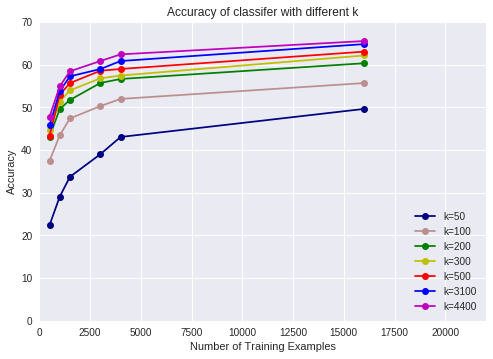

In [0]:
print("Fig 4. Accuracy of classifer with different k")
accuracy_50=[22.43,29.07,33.7,39,43.04,49.61]
accuracy_100=[37.47,43.42,47.37,50.26,51.95,55.66]
accuracy_200=[43.14,49.58,51.7,55.68,56.62,60.3]
accuracy_300=[44.64,51.31,53.94,56.77,57.42,62.12]
accuracy_500=[43.36,52.92,55.65,58.54,58.96,63.02]
accuracy_3100=[45.74,53.76,57.23,58.94,60.82,64.78]
accuracy_4400=[47.8,54.89,58.41,60.82,62.38,65.5]
x_la=[500,1000,1500,3000,4000,16000]
plt.plot(x_la,accuracy_50,marker='o',color='#000080',label='k=50')
plt.plot(x_la,accuracy_100,marker='o',color='#BC8F8F',label='k=100')
plt.plot(x_la,accuracy_200,'g-o',label='k=200')
plt.plot(x_la,accuracy_300,'y-o',label='k=300')
plt.plot(x_la,accuracy_500,'r-o',label='k=500')
plt.plot(x_la,accuracy_3100,'b-o',label='k=3100')
plt.plot(x_la,accuracy_4400,'m-o',label='k=4400')
plt.legend(loc='lower right')
plt.title('Accuracy of classifer with different k')  
plt.axis([0,22000,0,70])
plt.ylabel('Accuracy')
plt.xlabel('Number of Training Examples')
plt.show()


### Accuracy





>We perform a ten-fold cross-validation during the validation stage. The reason we use ten-fold cross-validation is it can estimate the expected fit level of a model while using an dataset that is independent from the data that used for training.



>The average accuracy after 10 times of validations is ***62.06%*** . Based on 16082 rows of data and first 300 K-value selected. We plot two confusion matrics to show our model's accuracy. One matrix ***Figure.3*** is of the training test while another one ***Figure.5*** is of ten-fold cross-validation. The distribution clearly shows the strongly consistent between the true label and the predicted label. 



>We also plot two tables: ***Table1*** and ***Table2*** to display the **"Average Precision"**, **"Recall"**, and **"F1-score"** of each label has also been made to show our model's accuracy more clearly. 

>Since we are not allowed to use any sklearn library to do evaluation, we have designed a customized confusion matric function to perform the calculation. To specify the three parameters above, we use: **TP (true positive)**, **FN (false negative)**, **FP (false positive)**, **TN (true negative)** four arguments to do the calculation.

>Formulas to calculate ***"Accuracy"***,**"Average Precision"**, **"Recall"**, and **"F1-score"**



>\begin{equation}
    Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
\end{equation}

>\begin{equation}
    Precision (p) = \frac{TP}{TP+FP}
\end{equation}

\begin{equation}
    Recall (r) = \frac{TP}{TP+FN}
\end{equation}

\begin{equation}
    F\_measure (F) = \frac{2rp}{r+p} = \frac{2TP}{2TP+FN+FP}
\end{equation}

\begin{equation}
    TPR = \frac{TP}{TP+FN} 
\end{equation}

\begin{equation}
    FPR = \frac{FP}{FP+TN} 
\end{equation}














#### Ten-fold validation(Estimated running time:1 hour and 20 mins)

In [0]:
start_time = datetime.datetime.now()
#print detail version 
def Ten_fold_detail(X_y):
    # split 10 X_y nparray
    confusion_matrix = np.zeros(shape=(30, 30))
    cumulate_acc = 0.0
    for i in range(0, 10):
        if i == 0:
            X_train = X_y[(i+1)*2010:, :13626]  # from 2010 to 20103
            y_train = X_y[(i+1)*2010:, 13626:]
            X_test = X_y[:(i+1)*2010, :13626]  # from 0 to 2010
            y_test = X_y[:(i+1)*2010, 13626:]
        elif i == 9:
            X_train = X_y[:i * 2010, :13626]  # from 0 to 18090
            y_train = X_y[:i * 2010, 13626:]
            X_test = X_y[i * 2010:, :13626]  # from 18090 to 20103
            y_test = X_y[i * 2010:, 13626:]
        else:
            X_test = X_y[i * 2010: (i+1) * 2010, :13626]
            y_test = X_y[i * 2010: (i+1) * 2010, 13626:]
            X1 = X_y[:i * 2010, :13626]   # before test
            y1 = X_y[:i * 2010, 13626:]
            X2 = X_y[(i+1) * 2010:, :13626]    # after test
            y2 = X_y[(i + 1) * 2010:, 13626:]

            X_train = np.concatenate((X1, X2), axis=0)
            y_train = np.concatenate((y1, y2), axis=0)  # append the list together
        print (i,"split array finish")

        # calculate the sigma, u and s
        m = len(X_train)
        sigma = (1 / m) * np.dot(X_train.T, X_train)
        print (i,"sigma finish")
        U300, s300, _ = scipy.sparse.linalg.svds(sigma, k=300, return_singular_vectors="u")
        print (i,"SVD finish")

        # calculate all the theta
        all_theta = oneVsAll(X_train, U300, y_train, 30, 0.1)

        # calculate Z
        Z = np.dot(X_test, U300)
        print ("Z text finish ")

        # predict the result of y
        pred_y = predictOneVsAll(all_theta, Z)

        # add value to matrix
        for j in range(len(y_test)):
            confusion_matrix[int(pred_y[j][0])][int(y_test[j][0])] = confusion_matrix[int(pred_y[j][0])][int(y_test[j][0])] + 1
        print ("add to matrix finish")

        # calculate the accuracy
        pitch = 0
        for j in range(len(y_test)):
            if y_test[j] == pred_y[j]:
                pitch = pitch + 1
        accu = (1.0 * pitch) / len(y_test)
        cumulate_acc = cumulate_acc + accu
        print ("NO."+str(i)+' test finish!!!!  Training Accuracy:', str(accu),"Train size",len(X_train),"        Test size",len(X_test))

    total_acc = cumulate_acc/10
    print ("Ten fold test finish!!!! Average Training Accuracy:", str(total_acc))
    return confusion_matrix


In [0]:
#print no-detail version 
def Ten_fold(X_y):
    # split 10 X_y nparray
    confusion_matrix = np.zeros(shape=(30, 30))
    cumulate_acc = 0.0
    for i in range(0, 10):
        if i == 0:
            X_train = X_y[(i+1)*2010:, :13626]  # from 2010 to 20103
            y_train = X_y[(i+1)*2010:, 13626:]
            X_test = X_y[:(i+1)*2010, :13626]  # from 0 to 2010
            y_test = X_y[:(i+1)*2010, 13626:]
        elif i == 9:
            X_train = X_y[:i * 2010, :13626]  # from 0 to 18090
            y_train = X_y[:i * 2010, 13626:]
            X_test = X_y[i * 2010:, :13626]  # from 18090 to 20103
            y_test = X_y[i * 2010:, 13626:]
        else:
            X_test = X_y[i * 2010: (i+1) * 2010, :13626]
            y_test = X_y[i * 2010: (i+1) * 2010, 13626:]
            X1 = X_y[:i * 2010, :13626]   # before test
            y1 = X_y[:i * 2010, 13626:]
            X2 = X_y[(i+1) * 2010:, :13626]    # after test
            y2 = X_y[(i + 1) * 2010:, 13626:]

            X_train = np.concatenate((X1, X2), axis=0)
            y_train = np.concatenate((y1, y2), axis=0)  # append the list together

        # calculate the sigma, u and s
        m = len(X_train)
        sigma = (1 / m) * np.dot(X_train.T, X_train)
        U300, s300, _ = scipy.sparse.linalg.svds(sigma, k=300, return_singular_vectors="u")
        # calculate all the theta
        all_theta = oneVsAll_ten_fold(X_train, U300, y_train, 30, 0.1)

        # calculate Z
        Z = np.dot(X_test, U300)

        # predict the result of y
        pred_y = predictOneVsAll(all_theta, Z)

        # add value to matrix
        for j in range(len(y_test)):
            confusion_matrix[int(pred_y[j][0])][int(y_test[j][0])] = confusion_matrix[int(pred_y[j][0])][int(y_test[j][0])] + 1

        # calculate the accuracy
        pitch = 0
        for j in range(len(y_test)):
            if y_test[j] == pred_y[j]:
                pitch = pitch + 1
        accu = (1.0 * pitch) / len(y_test)
        cumulate_acc = cumulate_acc + accu
        print ("NO."+str(i)+' test finish!!!!  Training Accuracy:', str(accu),"Train size",len(X_train),"        Test size",len(X_test))

    total_acc = cumulate_acc/10
    print ("Ten fold test finish!!!! Average Training Accuracy:", str(total_acc))
    return confusion_matrix

In [0]:
the_fold_confusion_matrix = Ten_fold(X_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log


NO.0 test finish!!!!  Training Accuracy: 0.6134328358208955 Train size 18093         Test size 2010
NO.1 test finish!!!!  Training Accuracy: 0.6388059701492538 Train size 18093         Test size 2010
NO.2 test finish!!!!  Training Accuracy: 0.6218905472636815 Train size 18093         Test size 2010
NO.3 test finish!!!!  Training Accuracy: 0.6293532338308457 Train size 18093         Test size 2010
NO.4 test finish!!!!  Training Accuracy: 0.6288557213930348 Train size 18093         Test size 2010
NO.5 test finish!!!!  Training Accuracy: 0.6278606965174129 Train size 18093         Test size 2010
NO.6 test finish!!!!  Training Accuracy: 0.609950248756219 Train size 18093         Test size 2010
NO.7 test finish!!!!  Training Accuracy: 0.6124378109452736 Train size 18093         Test size 2010
NO.8 test finish!!!!  Training Accuracy: 0.6179104477611941 Train size 18093         Test size 2010
NO.9 test finish!!!!  Training Accuracy: 0.6050670640834576 Train size 18090         Test size 2013
T

In [0]:
print('\nTime-Fold Validation(Time: {})'.format(datetime.datetime.now() - start_time)) 


Time-Fold Validation(Time: 1:20:23.432599)


Fig. 5 Confusion Matrix of the test-data of ten-fold validation(X_axis is the predicted labels & Y_axis is the actual labels)


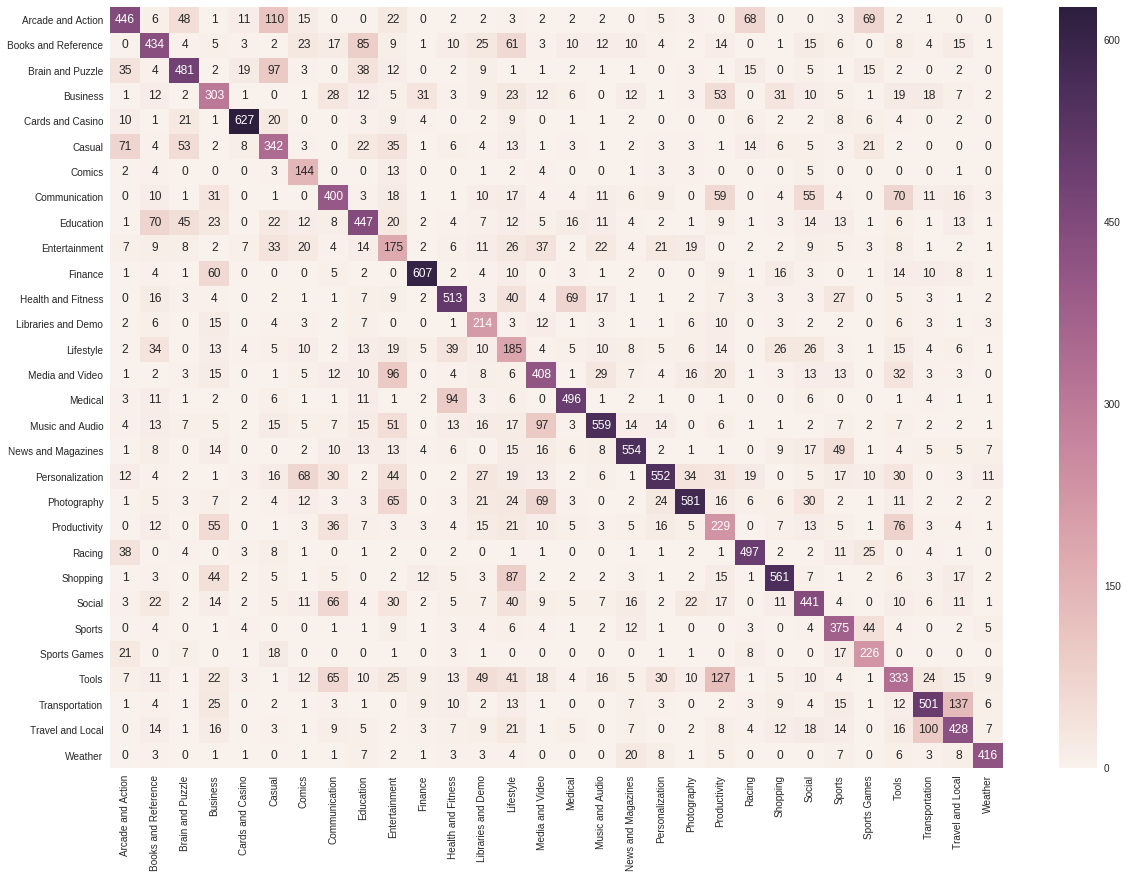

In [0]:
print('Fig. 5 Confusion Matrix of the test-data of ten-fold validation(X_axis is the predicted labels & Y_axis is the actual labels)')
show_confusion_matrix(the_fold_confusion_matrix,labelArray)

In [0]:

label=np.arange(0,30)
x = PrettyTable(['Label', 'Precision', 'recall', 'F1-score','Support'])
for i in label:
  TP=the_fold_confusion_matrix[i,i]
  FN = np.sum(the_fold_confusion_matrix[i]) - TP
  FP = np.sum(the_fold_confusion_matrix[:, i]) - TP
  TN = np.sum(the_fold_confusion_matrix) - TP - FN - FP
  precision =(TP / (TP + FP))
  recall = TP / (TP + FN)
  F_measure = TP / (2*TP + FP + FN)
  Support= (TP + FN)
  x.add_row([labelArray[i],round(precision,3),round(recall,3), round(F_measure,3),round(Support,0)])
print('Table 2. Precision,Recall,F1 and Support score for each label(ten-fold validation)')
print(x)

Table 2. Precision,Recall,F1 and Support score for each label(ten-fold validation)
+---------------------+-----------+--------+----------+---------+
|        Label        | Precision | recall | F1-score | Support |
+---------------------+-----------+--------+----------+---------+
|  Arcade and Action  |   0.665   | 0.542  |  0.299   |  823.0  |
| Books and Reference |   0.595   | 0.554  |  0.287   |  784.0  |
|   Brain and Puzzle  |   0.688   |  0.64  |  0.331   |  752.0  |
|       Business      |   0.443   | 0.496  |  0.234   |  611.0  |
|   Cards and Casino  |   0.892   | 0.846  |  0.434   |  741.0  |
|        Casual       |   0.471   | 0.544  |  0.252   |  629.0  |
|        Comics       |   0.401   | 0.774  |  0.264   |  186.0  |
|    Communication    |   0.559   | 0.534  |  0.273   |  749.0  |
|      Education      |   0.602   | 0.578  |  0.295   |  774.0  |
|    Entertainment    |   0.253   | 0.379  |  0.152   |  462.0  |
|       Finance       |   0.865   | 0.793  |  0.414   |  76

### Extensive Analysis

>In this part, we have an extensive analysis.



>Back to the selection of variance retained, the ***Figure. 4*** shows our classifier's accuracy trending curve on different K-values when the training examples are being added.




>It can be noticed that, when K-value is bigger than 200, the each one's fitting situation tends to be the same. When the training data is 16000, the accuracy float between from 60% to 65%. Since it will cost much more time to do the training when K-value is 4400 with 95% variance retained. We finally chose 300 as our K-value since it gives nearly the same accuracy as 95% variance retained while providing best performance which means you can run it on Google Colab without worrying about memory usage.



>***Figure. 4*** shows the relationship between the number of training examples, accuracy, and K-values. An interesting thing is, when we trained our model with 95% variance retained, the precision is nearly 80% with validation on the training set. And if the test_set.csv is used, the precision would drop down to 65% which means the precision is pretty much the same with the model with a K-value of 300. In other words, when the K-value is 300, it can achieve almost the same predicting accuracy compared to K-value 4362 with 95% variance retained. Furthermore, overfitting will happen when the K-value is 4362 since its accuracy decreased by 15% when we use a testing set which is completely different from the training set. It can also prove that is possible to achieve high training efficiency on Colab by reducing the dataset with a proper K-value by apply the core concept on using PCA to reduce dimensions.

>The ***Table 2*** (Precision, Recall, F1 and Support score) shows that our classifier perform relatively poor in between some labels, such as Entertainment label, Lifestyle label and productivity label. By further analyzing ***Fig.5*** (Confusion Matrix of the test-data of ten-fold validation), it is found that those our classifier performs poorly on applications among Entertainment, Media and Video and Photography, and between Productivity and Tools as well as between Transportation and Travel and Local.

> 

## D. Export Results 

This is important for your grading.


You must save a file named “**predicted_labels.csv**” in the **same data format** as “training_labels.csv”.

You can use PyDrive to save the data file (example is not provided here and you should find out how to do it on your own).

Make sure the predictions (classiﬁcation results for the test set) are in the **same order** as test inputs, i.e. the ﬁrst row of “predicted_labels.csv” corresponds to the ﬁrst row of “test_data.csv” and so on). 

Your score will be based on how accurate your approach is. We will collect “predicted_labels.csv” and compare it to the actual labels to get the accuracy of your approach. For further testing purposes, we may use a diﬀerent test set while grading.


**Insert the url address of your predicted_labels.csv file: https://drive.google.com/open?id=1oTE8ROG8tJ5C2F5vPuOKtNHPl2AMM5O4



In [0]:
#read X from the file
count = 0
with open('test_data.csv') as join:
    X_test_pre = []
    spamreader = csv.reader(join, quotechar=',')
    for row in spamreader:
        a = len(row)
        X_test_pre.append(row)
    index = 0  #Delete column 1
    X_test_pre = [ (x[index+1:])  for x in X_test_pre]
    X_test_pre = np.asarray(X_test_pre)
    X_test_pre = X_test_pre.astype(np.float)

In [0]:
# do the predict
Z_test_pre = np.dot(X_test_pre, U300)
pred_test_pre = predictOneVsAll(all_theta,Z_test_pre)

In [0]:
# instead the number label by string label
length_pre = len(pred_test_pre)
result_label = np.zeros((length_pre, 1), dtype=object)
for i in range(0, length_pre):
  labelnum = pred_test_pre[i][0]
  result_label[i][0] = labelArray[int(labelnum)]



In [0]:
# read url list
result_label = np.zeros((length_pre, 1), dtype=object)
for i in range(0, length_pre):
  labelnum = pred_test_pre[i][0]
  result_label[i][0] = labelArray[int(labelnum)]
result_url = np.zeros((length_pre, 1), dtype=object)
count = 0
with open('test_data.csv') as url:
    spamreader = csv.reader(url, quotechar=',')
    for row in spamreader:
        result_url[count,0] = row[0]
        count = count + 1
        if count == 2233:
          break
    

In [0]:
# combine url with label
test_result = np.concatenate((result_url, result_label),axis=1)

In [0]:
test_result

array([['dalmax.games.turnBasedGames.connect4', 'Brain and Puzzle'],
       ['com.holfeld.japaneseplusfree', 'Travel and Local'],
       ['com.mobileApp.controller', 'Productivity'],
       ...,
       ['com.daeha.android.app.repeat_ja_ko', 'Books and Reference'],
       ['com.sec.android.allShareControl', 'Media and Video'],
       ['com.mobileriders.butt.sculpting.exercises',
        'Health and Fitness']], dtype=object)

In [0]:
# write the result into colab
with open('predicted_labels.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',', quotechar='\n', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(test_result)

In [0]:
#write test_result.csv to google drive
file2 = drive.CreateFile()
# Read file and set it as a content of this instance.
file2.SetContentFile('predicted_labels.csv')
file2.Upload() # Upload the file

## E. Discussion (max 300 words)

*Provide a meaningful and relevant personal reflection.* 
*Argue around the results from the experiments. Try to explain things like why or why not one classifier performed better than the other in some aspects or why results for a given class were so bad. The discussion is about the results and it should be more technical than philosophical (don't talk about your feelings).*


>The experimental results show that our classifier is able to complete the precise classification to some extent, and further discussion is provided in this section.

#### Classifier performance

>The ten-fold validation shows that the accuracy of our classifier is about 62.06%, however the results can be further improved. According to ****Table 2****and ****Fig.5****, it is found that those our classifier performs poorly on applications among Entertainment, Media and Video and Photography, and between Productivity and Tools as well as between Transportation and Travel and Local. These labels are similar in both functions and application descriptions, so if we want to improve the results of our classifier, we could force on these groups. For example, we can first build logistic regression classifier between those confusing combinations, to see if it can help us improve the results. Furthermore, there might be loss of important data in the chosen tf-idf in this case, so we can ask some human experts review and re-analysis these tf-idf. 

#### Running time

>Running time is also an important criterion for judging the classifiers, however, in this case, it is required to run the algorithm on Google Colab, where the RAM is limited to 12GB and it seems that those redundant variable cannot be released once they are created. So, in some situation, we have to balance the running time and the use of RAM. In the data loading process, we put csv documents into numpy array line by line to reduce memory usage, and through this method it saves at least 4GB memory comparing to load data by pandas.read_csv. Although it may cost more time, considering the saving on resources, it is worthy.


## F. Conclusion and future work (max 200 words)

*Provide meaningful conclusions based on your results and suggest meaningful future work.*




>In this paper, we first apply PCA to reduce dimension of the training data, and the classifier trained by logistic regression using one-vs-all method. Ten-folder cross validation is implemented and it is proved that our algorithm can achieve 62.06% accuracy. We also provide a very detailed experiments and analysis about our results.
In the future, we can focus on those poorly classified combinations, by rebuilding classifier only between these groups and asking some human experts to filter out small variance features. Furthermore, the name of application has been totally ignored in this case, we could also involve the names in our classifier.


## G. References

*You should provide appropriate citations throughout your report and list your references here.*

list of references

1.The Statistics Portal (2017), *Number of available apps in the Apple App Store from July 2008 to January 2017*, viewed 5 May 2018,  https://www.statista.com/statistics/263795/number-of-available-apps-in-the-apple-app-store/

2.The Statistics Portal (2018), *Number of available applications in the Google Play Store from December 2009 to December 2017*, viewed 5 May 2018, https://www.statista.com/statistics/263795/number-of-available-apps-in-the-apple-app-store/

3.Mcdonald, D. & Kelly, U.(2018), *Value and benefits of text mining*, https://www.jisc.ac.uk/reports/value-and-benefits-of-text-mining

4.Ananiadou, S., Thompson, P., Thomas, J., Mu, T., Oliver, S., & Rickinson, M., et al. (2010). *Supporting the education evidence portal via text mining. Philosophical Transactions*, 368(1925), 3829.

5.Dong, L., Wesseloo, J., Potvin, Y., & Li, X. (2016). *Discrimination of mine seismic events and blasts using the fisher classifier, naive bayesian classifier and logistic regression*. Rock Mechanics & Rock Engineering, 49(1), 183-211.

6.Lin, C. J., Weng, R. C., & Keerthi, S. S. (2008). *Trust region newton method for logistic regression*. Journal of Machine Learning Research, 9(2), 627-650. 



# Sumbitting your assignment

You must share only 1 folder with your tutor.
The folder should have your group's unikeys in its name ( example: Assignment1_abxy6273_edfr3373_yhfr4534 ).

The folder should contain a Colab notebook and the output file.

Suggested structure of the folder:

* Data
 * training_data.csv
 * training_desc.csv
 * training_labels.csv
 * test_data.csv
* Assignment1.ipynb
* predicted_labels.csv

Ask your tutor for his email address and share the properly named folder with him before 5:00pm on May 7th 2018. 
Every late day will cost you 20 marks.

